<a href="https://colab.research.google.com/github/YoelLuciano/socketsluciano/blob/main/Grafo_codigo_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

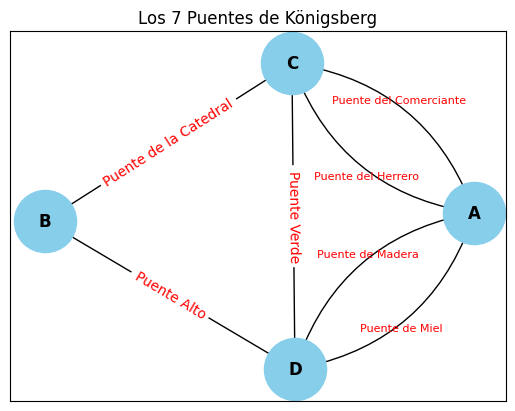

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo como multigrafo para permitir aristas múltiples
G = nx.MultiGraph()

# Añadir los 4 nodos que representan las regiones de Königsberg
G.add_nodes_from(['A', 'B', 'C', 'D'])

# Añadir las 7 aristas
G.add_edge('A', 'C', label='Puente del Comerciante')
G.add_edge('A', 'C', label='Puente del Herrero')
G.add_edge('A', 'D', label='Puente de Madera')
G.add_edge('A', 'D', label='Puente de Miel')
G.add_edge('B', 'C', label='Puente de la Catedral')
G.add_edge('B', 'D', label='Puente Alto')
G.add_edge('C', 'D', label='Puente Verde')

pos = nx.spring_layout(G)  # disposición automática

edge_counts = {}
for u, v in G.edges():
    pair = tuple(sorted([u, v]))
    edge_counts[pair] = edge_counts.get(pair, 0) + 1

curve_counter = {}
for u, v, data in G.edges(data=True):
    pair = tuple(sorted([u, v]))
    if edge_counts[pair] > 1:  # Solo curvar si hay múltiples aristas
        curve_counter[pair] = curve_counter.get(pair, 0)
        rad = 0.3 if curve_counter[pair] == 0 else -0.3
        nx.draw_networkx_edges(G, pos, [(u, v)], connectionstyle=f"arc3,rad={rad}")
        curve_counter[pair] += 1
    else:  # Arista recta si es única
        nx.draw_networkx_edges(G, pos, [(u, v)])

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Etiquetas para aristas múltiples y únicas
edge_labels = {}
curve_counter = {}
for u, v, data in G.edges(data=True):
    pair = tuple(sorted([u, v]))
    if edge_counts[pair] > 1:  # Aristas múltiples - usar coordenadas calculadas
        curve_counter[pair] = curve_counter.get(pair, 0)
        x1, y1, x2, y2 = pos[u][0], pos[u][1], pos[v][0], pos[v][1]
        offset = 0.15 if curve_counter[pair] == 0 else -0.15
        mid_x = (x1 + x2) / 2 + offset * (y2 - y1)
        mid_y = (y1 + y2) / 2 + offset * (x1 - x2)
        plt.text(mid_x, mid_y, data['label'], color='red', fontsize=8, ha='center', va='center')
        curve_counter[pair] += 1
    else:  # Arista única - usar networkx normal
        edge_labels[(u, v)] = data['label']

if edge_labels:  # Solo si hay aristas únicas
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_color='red')

plt.title("Los 7 Puentes de Königsberg")
plt.show()